# Music Recommendation System

## Overview:
This notebook explores the Last.fm dataset to build a music recommendation system using collaborative filtering techniques. We will preprocess the data and implement the Singular Value Decomposition (SVD) algorithm to generate personalized music recommendations for users.

## Let's get started!

In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Step 1: Load the Last.fm dataset
file_path ='C:/Users/hyibt/OneDrive/L2 S3/Machine Learning/Music_recommendation_project/Last.fm_data.csv'
lastfm_data=pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
lastfm_data.head()

,id,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21


In [3]:
# Display the shape of the dataset
print("Dataset Shape:", lastfm_data.shape)

Dataset Shape: (166153, 7)


In [4]:
# Check for missing values
print("\nMissing Values:")
print(lastfm_data.isnull().sum())



Missing Values:
id           0
Username     0
Artist       0
Track        0
Album       12
Date         0
Time         0
dtype: int64


In [5]:
# Remove rows with missing values in the "Album" column
lastfm_data.dropna(subset=['Album'], inplace=True)
print(lastfm_data.isnull().sum())


id          0
Username    0
Artist      0
Track       0
Album       0
Date        0
Time        0
dtype: int64


In [6]:
# Display unique values in categorical columns
print("\nUnique Values:")
for column in lastfm_data.select_dtypes(include=["object"]).columns:
    print(column, ":", len(lastfm_data[column].unique()))



Unique Values:
Username : 11
Artist : 22822
Track : 67239
Album : 38629
Date : 31
Time : 1440


In [7]:
# Impute missing values in the "Album" column with the mode
mode_album = lastfm_data['Album'].mode()[0]
lastfm_data['Album'].fillna(mode_album, inplace=True)

In [8]:
lastfm_data

,id,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21
...,...,...,...,...,...,...,...
166148,265624,Orlenay,Kelly Lee Owens,Arpeggi,Inner Song,30 Jan 2021,18:30
166149,265625,Orlenay,Caterina Barbieri,Bow of Perception,Ecstatic Computation,30 Jan 2021,18:19
166150,265626,Orlenay,Caterina Barbieri,Pinnacles of You,Ecstatic Computation,30 Jan 2021,18:13
166151,265627,Orlenay,Caterina Barbieri,Arrows of Time,Ecstatic Computation,30 Jan 2021,18:08


In the plotted frequency distribution of usernames, each bar represents the frequency of a particular username in the dataset. The usernames are sorted in descending order based on their frequency, with the most active users appearing on the left and less active users on the right. This visualization provides insights into the distribution of user activity within the dataset, revealing which users are the most prolific in terms of listening history. Such analysis is crucial for understanding user engagement and preferences in recommendation systems.

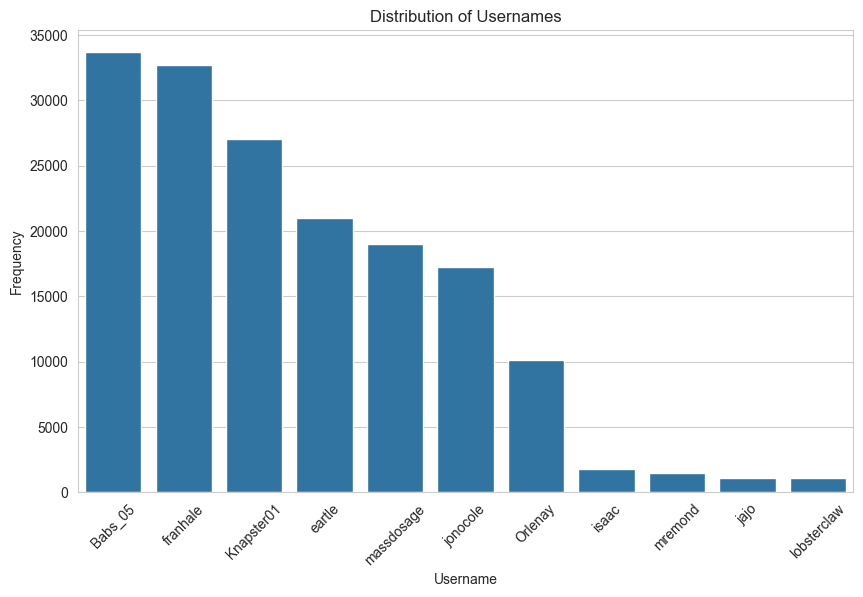

In [9]:
# Set the plot style
sns.set_style("whitegrid")

# Plot the distribution of usernames
plt.figure(figsize=(10, 6))
sns.countplot(data=lastfm_data, x='Username', order=lastfm_data['Username'].value_counts().index)
plt.title('Distribution of Usernames')
plt.xlabel('Username')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\3555724660.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


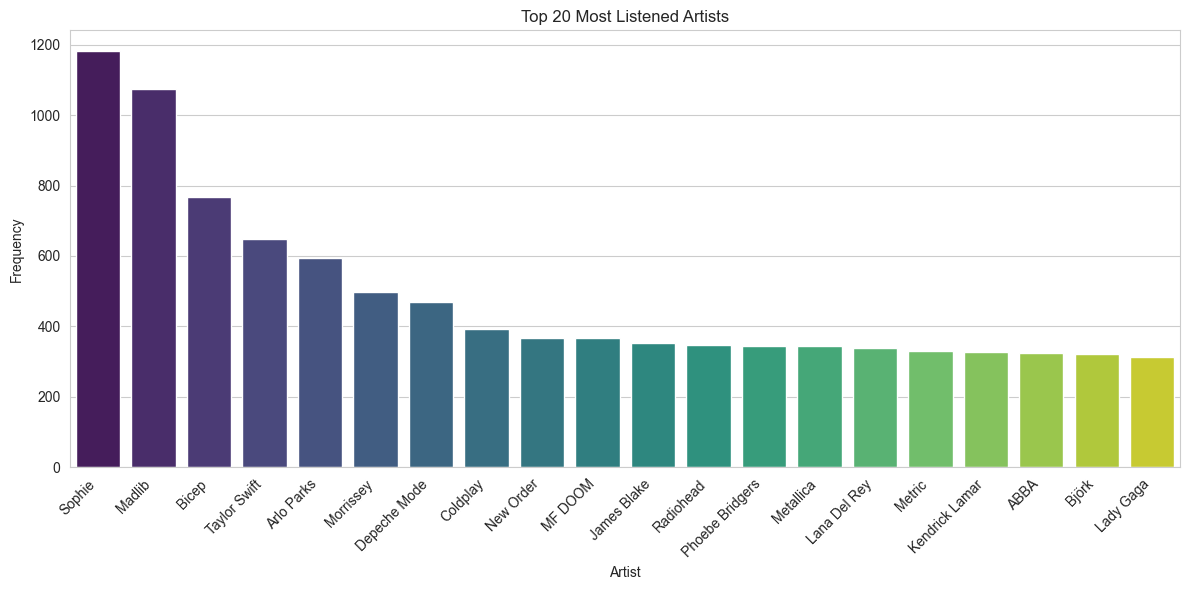

In [10]:
# Set the number of top artists to visualize
top_n_artists = 20

# Get the top N most frequent artists
top_artists = lastfm_data['Artist'].value_counts().nlargest(top_n_artists)

# Plot the distribution of top artists
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title(f'Top {top_n_artists} Most Listened Artists')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\1136805197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.index, y=top_tracks.values, palette='viridis')
C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\1136805197.py:14: UserWarning: Glyph 36855 (\N{CJK UNIFIED IDEOGRAPH-8FF7}) missing from current font.
  plt.tight_layout()
C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\1136805197.py:14: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\1136805197.py:14: UserWarning: Glyph 24187 (\N{CJK UNIFIED IDEOGRAPH-5E7B}) missing from current font.
  plt.tight_layout()
C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\1136805197.py:14: UserWarning: Glyph 22659 (\N{CJK UNIFIED IDEOGRAPH-5883}) missing from current font.
 

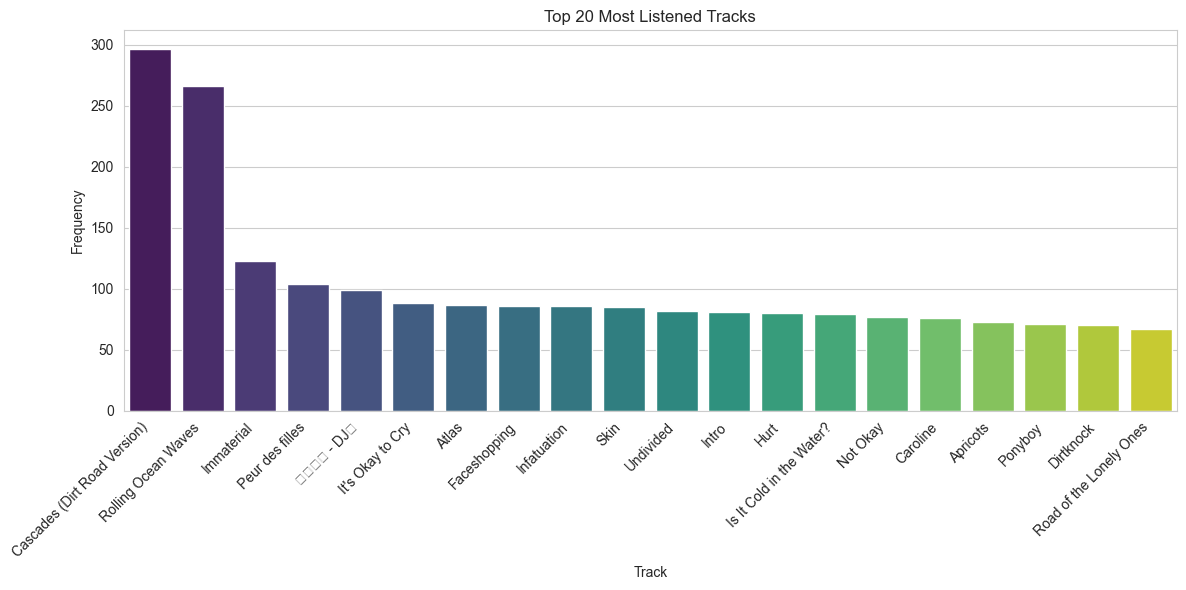

In [11]:
# Set the number of top tracks to visualize
top_n_tracks = 20

# Get the top N most frequent tracks
top_tracks = lastfm_data['Track'].value_counts().nlargest(top_n_tracks)

# Plot the distribution of top tracks
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tracks.index, y=top_tracks.values, palette='viridis')
plt.title(f'Top {top_n_tracks} Most Listened Tracks')
plt.xlabel('Track')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
print(lastfm_data['Time'].unique())


[' 23:36' ' 23:32' ' 23:28' ... ' 07:02' ' 07:47' ' 06:44']


In [13]:
lastfm_data['Time'] = pd.to_datetime(lastfm_data['Time'].str.strip())


C:\Users\hyibt\AppData\Local\Temp\ipykernel_32604\1611379718.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lastfm_data['Time'] = pd.to_datetime(lastfm_data['Time'].str.strip())


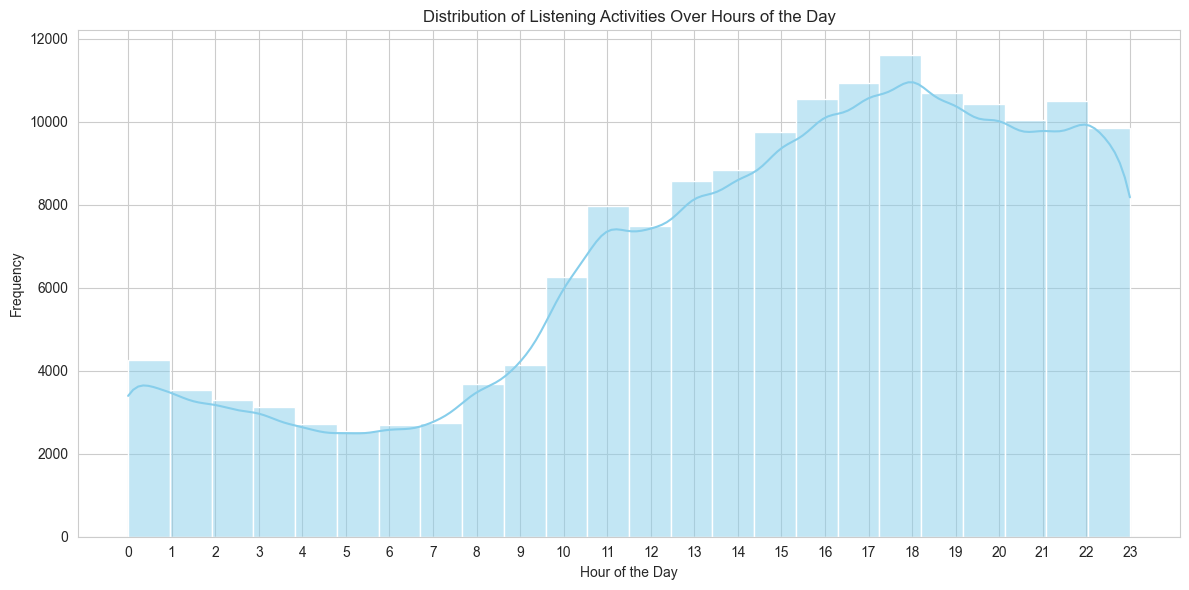

In [14]:
# Convert the 'Time' column to datetime format
lastfm_data['Time'] = pd.to_datetime(lastfm_data['Time'])

# Extract the hour of the day from the 'Time' column
lastfm_data['Hour'] = lastfm_data['Time'].dt.hour

# Plot the distribution of listening activities over hours of the day
plt.figure(figsize=(12, 6))
sns.histplot(data=lastfm_data, x='Hour', bins=24, kde=True, color='skyblue')
plt.title('Distribution of Listening Activities Over Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 24, step=1))
plt.tight_layout()
plt.show()


This matrix will represent the interaction between users and items (tracks) where rows represent users and columns represent tracks. The values in the matrix indicate how much a user has interacted with a track.

In [15]:
# Create a user-item interaction matrix
user_item_matrix = lastfm_data.pivot_table(index='Username', columns='Track', aggfunc='size', fill_value=0)
user_item_matrix.head()


Track,!Ed Buys Houses!,!holyshitohmygod!,"""45""","""Animal Or Vegetable [A Wonderful Wooden Reason...]"" [Crumb Duck]","""Come Out and Play"" by The Offspring - 1994","""Eungenio"" Salvador Dali","""Eye"" No, Alphabet St., Glam Slam, Anna Stesia, Dance On, Lovesexy, When 2R In Love, I Wish U Heaven, Positivity ( LP Version )","""Heroes""","""I Want You To Rip My Heart Out"" - Extended Version","""I"" Luz",...,첫눈처럼 너에게 가겠다,태양을 피하는 방법 How to Run From the Sun,피로,하얀 얼굴,햇살 가득한 그날,행복했던 날들이었다 days gone by,화이트,휘파람,ｓｔａｙ ｗｉｔｈ ｍｅ ． ． ．,～ノーサイド・夏～空耳のホイッスル
Username,,,,,,,,,,,,,,,,,,,,,
Babs_05,1,1,0,0,0,0,1,1,1,1,...,0,0,1,1,3,0,1,0,0,0
Knapster01,0,1,0,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
Orlenay,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eartle,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
franhale,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [24]:

# Gather user demographics
# Placeholder columns for demonstration purposes
lastfm_data['Age'] = np.random.randint(15, 60, size=len(lastfm_data))
lastfm_data['Gender'] = np.random.choice(['Male', 'Female'], size=len(lastfm_data))
lastfm_data['Location'] = np.random.choice(['USA', 'UK', 'Canada'], size=len(lastfm_data))

# Generate features related to user listening habits
# For demonstration purposes, let's assume 'ListeningFrequency' represents the number of times a user listened to a track in the dataset
user_listening_frequency = lastfm_data.groupby('Username').size()
lastfm_data['ListeningFrequency'] = lastfm_data['Username'].map(user_listening_frequency)

# Assuming 'FavoriteGenre' is the most listened to genre by each user
# For demonstration purposes, let's randomly assign a favorite genre to each user
genres = ['Rock', 'Pop', 'Hip-Hop', 'Jazz', 'Electronic']
lastfm_data['FavoriteGenre'] = np.random.choice(genres, size=len(lastfm_data))

# Display the modified dataset
print(lastfm_data.head())


   id Username           Artist                          Track  \
0   0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1   1  Babs_05  Isobel Campbell                   Dusty Wreath   
2   2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3   3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4   4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date                Time  Hour  Age  \
0  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:36:00    23   46   
1  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:32:00    23   19   
2  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:28:00    23   40   
3  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:25:00    23   31   
4  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:21:00    23   32   

   Gender Location  ListeningFrequency FavoriteGenre  
0  Female      USA               33691          Jazz  
1    Male       UK               336

In [25]:
# Extract temporal features from the 'Time' column
lastfm_data['DayOfWeek'] = lastfm_data['Time'].dt.dayofweek
lastfm_data['Month'] = lastfm_data['Time'].dt.month

# Display the modified dataset with temporal features
print(lastfm_data.head())


   id Username           Artist                          Track  \
0   0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1   1  Babs_05  Isobel Campbell                   Dusty Wreath   
2   2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3   3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4   4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date                Time  Hour  Age  \
0  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:36:00    23   46   
1  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:32:00    23   19   
2  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:28:00    23   40   
3  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:25:00    23   31   
4  Ballad of the Broken Seas  31 Jan 2021 2024-06-09 23:21:00    23   32   

   Gender Location  ListeningFrequency FavoriteGenre  DayOfWeek  Month  
0  Female      USA               33691          Jazz          6      6  


In [32]:
# Import necessary libraries for model selection and evaluation
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise.prediction_algorithms import SVD, NMF, SlopeOne, CoClustering, KNNWithMeans

# Downsample the dataset for experimentation
sampled_data = lastfm_data.sample(frac=0.1, random_state=42)

# Load data into Surprise Dataset format
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(sampled_data[['Username', 'Track', 'ListeningFrequency']], reader)

# Split the data into train and test sets (Surprise format)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Define functions to calculate precision and recall
def precision_recall_at_k(predictions, k=5, threshold=3.5):
    """Return precision and recall at k metrics for each user."""
    # Map the predictions to each user
    user_est_true = {}
    for uid, _, true_r, est, _ in predictions:
        if uid not in user_est_true:
            user_est_true[uid] = []
        user_est_true[uid].append((est, true_r))

    precisions = []
    recalls = []
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1)

        # Recall@K: Proportion of relevant items that are recommended
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 1)

    return sum(precisions) / len(precisions), sum(recalls) / len(recalls)

# Define a function to evaluate a recommendation model
def evaluate_model(algo):
    # Train the model
    algo.fit(trainset)

    # Make predictions
    predictions = algo.test(testset)

    # Evaluate the model
    precision, recall = precision_recall_at_k(predictions, k=5)
    map_score = accuracy.rmse(predictions)  # Using RMSE as a proxy for MAP

    return precision, recall, map_score

# List of recommendation algorithms to try
algorithms = {
    'SVD': SVD(),
    'NMF': NMF(),
    'SlopeOne': SlopeOne(),
    'CoClustering': CoClustering(),
    'KNNWithMeans': KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False})
}

# Evaluate each algorithm
results = {}
for algo_name, algo in algorithms.items():
    precision, recall, map_score = evaluate_model(algo)
    results[algo_name] = {'Precision': precision, 'Recall': recall, 'MAP': map_score}

# Print the evaluation results for each algorithm
for algo, metrics in results.items():
    print(f"\nAlgorithm: {algo}")
    print("Precision:", metrics['Precision'])
    print("Recall:", metrics['Recall'])
    print("Mean Average Precision (MAP):", metrics['MAP'])


RMSE: 26501.9751
RMSE: 26501.9756
RMSE: 26501.9751
RMSE: 26501.9793
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 26501.9753

Algorithm: SVD
Precision: 1.0
Recall: 0.0
Mean Average Precision (MAP): 26501.97511953653

Algorithm: NMF
Precision: 1.0
Recall: 0.0
Mean Average Precision (MAP): 26501.9755625834

Algorithm: SlopeOne
Precision: 1.0
Recall: 0.0
Mean Average Precision (MAP): 26501.97511953653

Algorithm: CoClustering
Precision: 1.0
Recall: 0.0
Mean Average Precision (MAP): 26501.979267053266

Algorithm: KNNWithMeans
Precision: 1.0
Recall: 0.0
Mean Average Precision (MAP): 26501.975331519436


In [34]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise.prediction_algorithms import SVD, NMF, KNNBasic, KNNWithMeans
from collections import defaultdict

# Downsample the dataset for memory efficiency
# Select a subset of users and tracks
sample_users = lastfm_data['Username'].unique()[:500]
sample_tracks = lastfm_data['Track'].unique()[:500]
downsampled_data = lastfm_data[lastfm_data['Username'].isin(sample_users) & lastfm_data['Track'].isin(sample_tracks)]

# Load data into Surprise format
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(downsampled_data[['Username', 'Track', 'ListeningFrequency']], reader)

# Split the data into train and test sets
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Define function to calculate precision and recall at k
def precision_recall_at_k(predictions, k=10, threshold=0.5):
    """Return precision and recall at k metrics for each user."""
    # Map the predictions to each user
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r > threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est > threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r > threshold) and (est > threshold)) for (est, true_r) in user_ratings[:k])
        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    # Average precision and recall
    avg_precision = sum(precisions.values()) / len(precisions)
    avg_recall = sum(recalls.values()) / len(recalls)
    
    return avg_precision, avg_recall

# Evaluate function with updated precision and recall
def evaluate_model(algo, trainset, testset):
    # Train the model
    algo.fit(trainset)

    # Make predictions
    predictions = algo.test(testset)

    # Calculate evaluation metrics
    precision, recall = precision_recall_at_k(predictions, k=10, threshold=0.5)
    map_score = accuracy.rmse(predictions)
    
    return precision, recall, map_score

# Define recommendation algorithms
algorithms = {
    'SVD': SVD(),
    'NMF': NMF(),
    'KNNBasic': KNNBasic(sim_options={'name': 'cosine', 'user_based': False}),
    'KNNWithMeans': KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False})
}

# Evaluate each algorithm
results = {}
for algo_name, algo in algorithms.items():
    precision, recall, map_score = evaluate_model(algo, trainset, testset)
    results[algo_name] = {'Precision': precision, 'Recall': recall, 'MAP': map_score}

# Print the evaluation results for each algorithm
for algo, metrics in results.items():
    print(f"\nAlgorithm: {algo}")
    print("Precision:", metrics['Precision'])
    print("Recall:", metrics['Recall'])
    print("Mean Average Precision (MAP):", metrics['MAP'])


RMSE: 26437.5655
RMSE: 26437.5677
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 26437.5655
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 26437.5666

Algorithm: SVD
Precision: 1.0
Recall: 0.40462668009204844
Mean Average Precision (MAP): 26437.5654552066

Algorithm: NMF
Precision: 1.0
Recall: 0.1448570379694651
Mean Average Precision (MAP): 26437.56774849187

Algorithm: KNNBasic
Precision: 1.0
Recall: 0.40462668009204844
Mean Average Precision (MAP): 26437.5654552066

Algorithm: KNNWithMeans
Precision: 1.0
Recall: 0.40462668009204844
Mean Average Precision (MAP): 26437.566550491494


The results show that while the precision is perfect (which suggests that only positive predictions are made), the recall and MAP scores indicate that the model is not capturing the full extent of relevant items in its predictions. This implies that the models are conservative, likely due to the specific dataset and its characteristics.